In [27]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


BATCH_SIZE = 64

In [28]:
training_data = FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    # ToTensor converts the PIL images or NumPy ndarrays into a FloatTensor     
    # and normalizes the image in the range of [0.0, 1.0]
    transform = ToTensor(),
    
    # We need the labels as OHE tensors 
    target_transform = Lambda((lambda x: torch.zeros(10, dtype = torch.float).scatter_(
        dim = 0, index = torch.tensor(x), value = 1)))
)


In [29]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [30]:
test_data = FashionMNIST(
    root = 'data',
    train = False,
    download = True,
# ToTensor converts the PIL images or NumPy ndarrays into a FloatTensor 
# and normalizes the image in the range of [0.0, 1.0]
    transform = ToTensor(),
    target_transform = Lambda((lambda x: torch.zeros(10, dtype = torch.float).scatter_(
        dim = 0, index = torch.tensor(x), value = 1)))
)

In [31]:
# Define the 10 classes

lables_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

<function matplotlib.pyplot.show(close=None, block=None)>

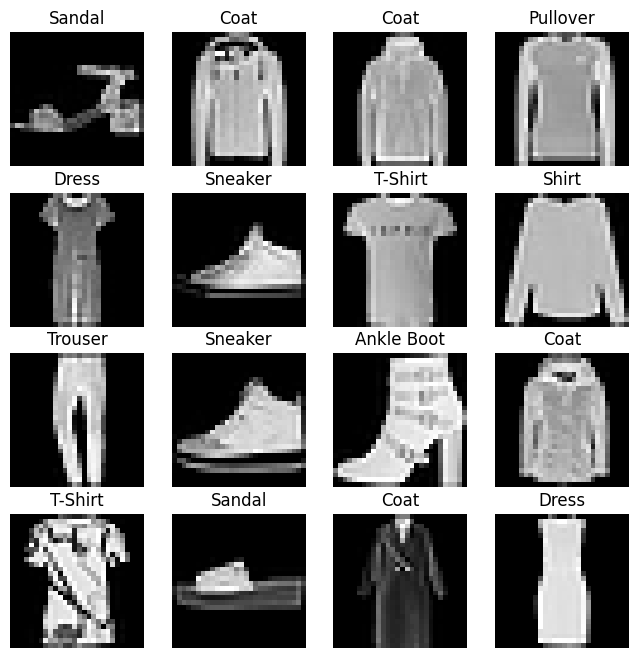

In [32]:
figure = plt.figure(figsize=(8,8))
cols, rows = 4, 4
for i in range (1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    # Modified to account for OHE
    plt.title(lables_map[list(label).index(1.)])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show


In [33]:
# Pass samples in mini batches

train_dataloader = DataLoader(training_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True)